In [112]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import bathymetry as Bathy

In [125]:
reload(Bathy)

map = np.zeros((50, 100))
map[:25, :50] = 0
map[25:, 50:] = -100
map[25:, :50] = -200
map[:25, 50:] = -50

map_test = Bathy.Map(map, 2.8995, 41.6995, 0.001)

In [126]:
print(map_test.llcorner_deg, map_test.urcorner_deg)

[ 2.8995 41.6995] [ 2.9995 41.7495]


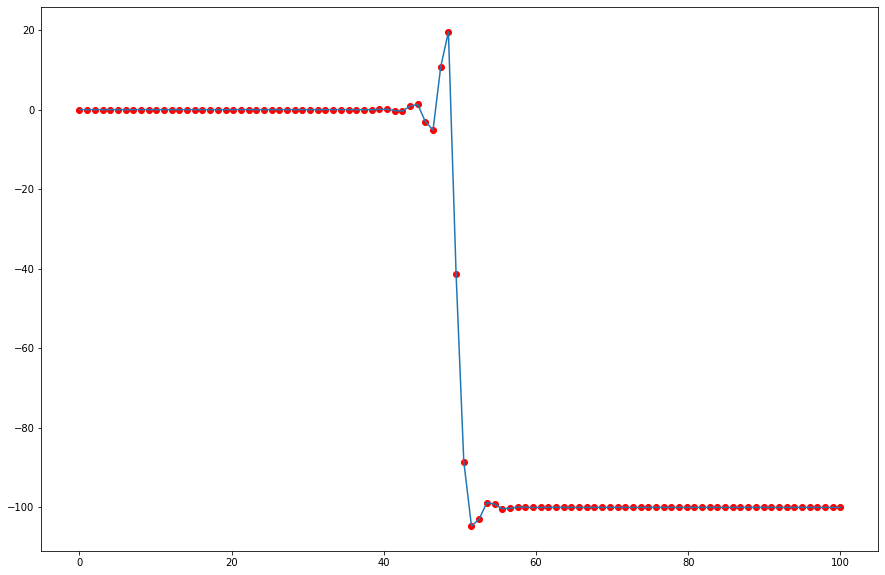

In [130]:
# start = (2.8995, 41.6995)  # lower left
start = (2.8995, 41.7495)  # upper left

# stop = (2.9995, 41.7495)  # upper right
stop = (2.9995, 41.6995)  # lower right


x, z = map_test.cut(start, stop, 100)

plt.figure(figsize=(15, 10))
plt.plot(x, z)
plt.scatter(x, z, c='r')

In [85]:
reload(Bathy)

map_path = '../src/asc/MNT_MED100m_GDL-CA_HOMONIM_WGS84_NM_ZNEG.asc'
map = Bathy.Map.from_asc(map_path)
print(map)

map with llcorner: [ 2.8995 41.6995] and urcorner: [ 7.9005 44.4005].
Shape = (5001, 2701).


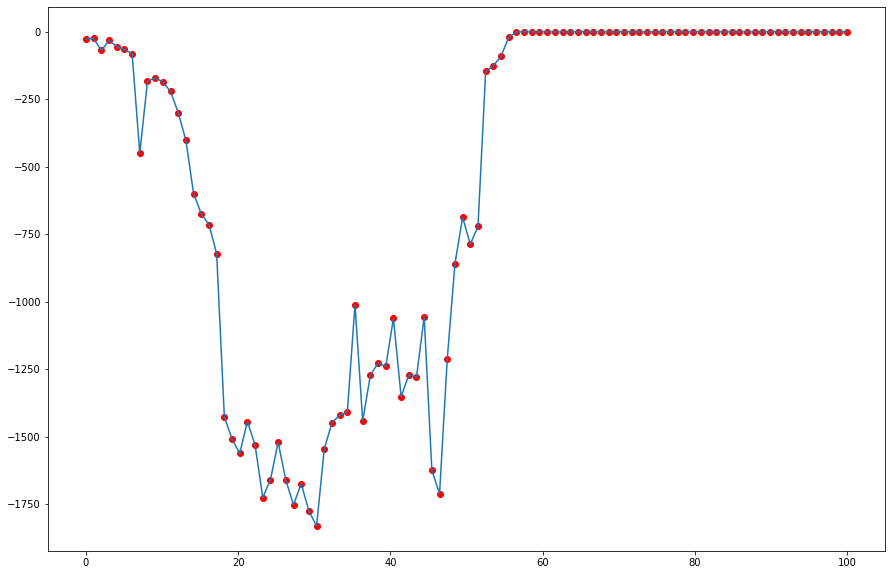

In [86]:
# start = (2.8995, 41.6995)  # lower left
start = (2.8995, 44.4005)  # upper left
# stop = (7.9005, 44.4005)  # upper right
stop = (7.9005, 41.6995)  # lower right

x, z = map.cut(start, stop, 100)

plt.figure(figsize=(15, 10))
plt.plot(x, z)
plt.scatter(x, z, c='r')